In [2739]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2740]:
data=pd.read_csv(r"C:\Users\suraj\Downloads\archive (14)\bengaluru_house_prices.csv")
df=pd.read_csv(r"C:\Users\suraj\Downloads\archive (14)\bengaluru_house_prices.csv")

In [2741]:
# len(data)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2742]:
# data.info

In [2743]:
data['location'].isnull().sum()
data = data.dropna(subset=['location'])

In [2744]:
# data['size'].nunique()
# data['size'].unique()
# data[data['size'].isnull()]
data=data.dropna(subset=['size'])

# As there are only 13 columns of RK type i can remove them to reduce complexity of data

In [2746]:
# data[data['size'].str.contains("RK", na=False)]

data=data[~data['size'].str.contains("RK", na=False)] 


# I can take bedroom as bhk and i.m going to remove the bhk string and bedroom str from number and changing the data type to int

In [2748]:
data['size'] = data['size'].str.replace('BHK', '', regex=False)
data['size'] = data['size'].str.replace('Bedroom', '', regex=False)
data['size'] = data['size'].str.strip()

data['size'].dtypes
data['size']=data['size'].astype('Int64')

In [2749]:
(data['society'].isnull().sum()/len(data['society']))*100

# As 41% of the data in this column is missing i would prefer to remove it


41.354401805869074

In [2750]:
data=data.drop(columns='society')

In [2751]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00


In [2752]:
# data['location'].isnull()
data['location'].nunique()

1296

In [2753]:
# data.groupby('location')['price'].mean().sort_values(ascending=False)

In [2754]:
loc_price_mean = data.groupby('location')['price'].mean()
data['location_target_enc'] = data['location'].map(loc_price_mean)

In [2755]:
# loc_price_mean

In [2756]:
# correlation with price
data[['location_target_enc', 'price']].corr() # high corr with price

,location_target_enc,price
location_target_enc,1.000000,0.630606
price,0.630606,1.000000


In [2757]:
# sns.regplot(x='location_target_enc', y='price', data=data)
# plt.show()

In [2758]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,location_target_enc
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07,48.316667
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00,115.015882
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00,61.252527
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00,115.348261
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00,95.630303


In [2759]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [2760]:
area_type_mean = data.groupby('area_type')['price'].mean()
data['area_type_enc'] = data['area_type'].map(area_type_mean)

In [2761]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,location_target_enc,area_type_enc
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07,48.316667,93.039255
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5.0,3.0,120.00,115.015882,209.368148
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2.0,3.0,62.00,61.252527,104.410868
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3.0,1.0,95.00,115.348261,93.039255
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2.0,1.0,51.00,95.630303,93.039255


In [2762]:
data.dtypes

area_type               object
availability            object
location                object
size                     Int64
total_sqft              object
bath                   float64
balcony                float64
price                  float64
location_target_enc    float64
area_type_enc          float64
dtype: object

In [2763]:
# data[data['total_sqft']=='1133 - 1384']
data[data['total_sqft'].str.contains("G", na=False)]


,area_type,availability,location,size,total_sqft,bath,balcony,price,location_target_enc,area_type_enc
6552,Plot Area,Ready To Move,5 Bedroom Farm House in Lakshmipura,5,24Guntha,6.0,2.0,550.0,550.000000,209.368148
9423,Plot Area,Ready To Move,Ramamurthy Nagar,1,1Grounds,1.0,1.0,48.0,88.402055,209.368148
11320,Plot Area,Ready To Move,Arishinakunte,1,38Guntha,1.0,0.0,170.0,153.333333,209.368148


In [2764]:
data['total_sqft'] = data['total_sqft'].str.replace('Sq. Meter', '', regex=False)
data['total_sqft'] = data['total_sqft'].str.replace('Sq. Yards', '', regex=False)
data['total_sqft'] = data['total_sqft'].str.strip()
data=data[~data['total_sqft'].str.contains("A", na=False)] 
data=data[~data['total_sqft'].str.contains("G", na=False)] 
data=data[~data['total_sqft'].str.contains("C", na=False)] 
data=data[~data['total_sqft'].str.contains("P", na=False)] 

# This function will replace the values like 1000-1100 with its mean which makes things easy for us

In [2766]:
def convert_sqft(x):
    try:
        if '-' in x:
            nums = x.split('-')
            return (float(nums[0]) + float(nums[1])) / 2
        else:
            return float(x)   # single number case
    except:
        return np.nan   # if not convertible (e.g. Sq. Meter etc.)

data.loc[data['total_sqft'].str.contains("-", na=False),'total_sqft'] = (data.loc[data['total_sqft'].str.contains("-", na=False), 'total_sqft'].apply(convert_sqft))


data['total_sqft'] = data['total_sqft'].astype(float)


In [2767]:
# pd.set_option("display.max_rows", None)
# data['total_sqft']

In [2768]:
data.drop(columns=['area_type', 'availability', 'location'], errors='ignore').corr()

,size,total_sqft,bath,balcony,price,location_target_enc,area_type_enc
size,1.000000,0.346318,0.897957,0.184590,0.398020,0.209355,0.417230
total_sqft,0.346318,1.000000,0.390570,0.147796,0.574272,0.318557,0.098301
bath,0.897957,0.390570,1.000000,0.201654,0.456084,0.253681,0.384664
balcony,0.184590,0.147796,0.201654,1.000000,0.119942,0.074861,-0.104201
price,0.398020,0.574272,0.456084,0.119942,1.000000,0.630327,0.275344
location_target_enc,0.209355,0.318557,0.253681,0.074861,0.630327,1.000000,0.124257
area_type_enc,0.417230,0.098301,0.384664,-0.104201,0.275344,0.124257,1.000000


# I'm going to remove balcony as its correlation with price is very less

In [2770]:
data=data.drop(columns='balcony')

In [2771]:
data.head()

,area_type,availability,location,size,total_sqft,bath,price,location_target_enc,area_type_enc
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,39.07,48.316667,93.039255
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,120.00,115.015882,209.368148
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,62.00,61.252527,104.410868
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,95.00,115.348261,93.039255
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,51.00,95.630303,93.039255


In [2772]:
# data['location'].unique(),data['location_target_enc'].unique()

# i'm going to remove null values from bath as the number is only 57

In [2774]:
# data[data['bath'].isnull()]

data = data.dropna(subset=['bath'])

In [2775]:
(len(data)/len(df))*100
# we have 99percent of the original data left after all this preprocessingS

99.24174174174173

# Now we have to deal with outliers

In [2777]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'price', 'location_target_enc', 'area_type_enc'],
      dtype='object')

In [2778]:
cols=['size','total_sqft','bath', 'location_target_enc', 'area_type_enc']

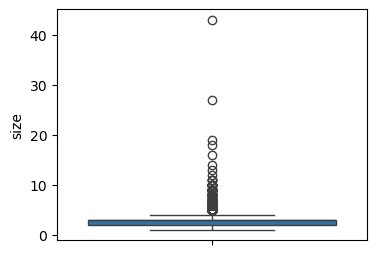

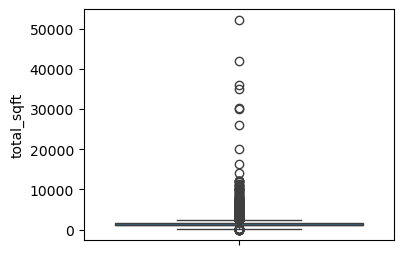

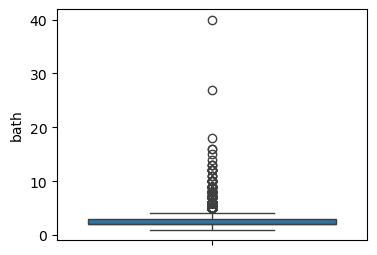

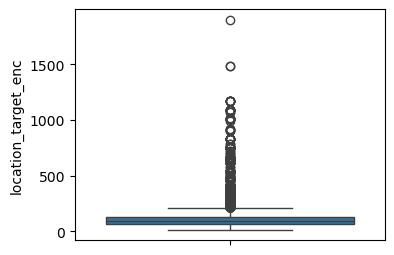

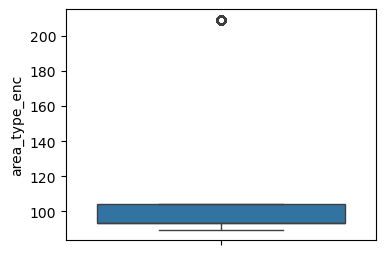

In [2779]:
for col in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(data[col])
    plt.show()

In [2780]:
data.loc[data['size']>=5,'size'].count()

839

# This IQR method will clip the values between the range of upper and lower bound values above upper will become equal to upper and same for lower

In [2782]:
def iqr_clip(Data,col):
    # Quartiles
    q1 = Data[col].quantile(0.25)
    q2 = Data[col].quantile(0.50)  # median (optional)
    q3 = Data[col].quantile(0.75)
    
    # IQR
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    # Clip values
    Data[col] = Data[col].astype('float').clip(lower, upper)
    
    return Data


In [2783]:
for col in cols:
    iqr_clip(data,col)

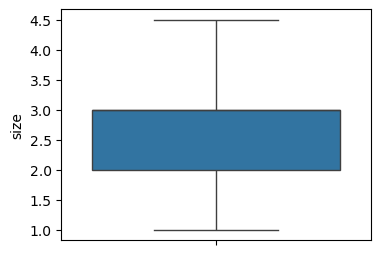

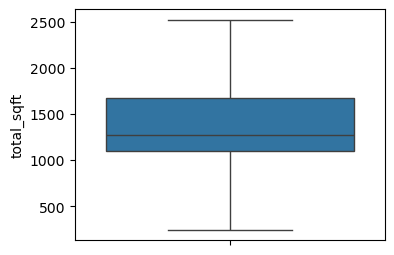

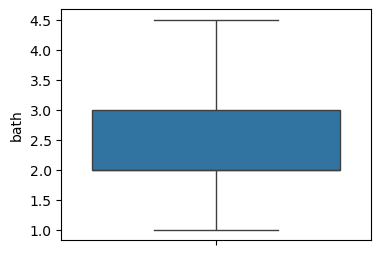

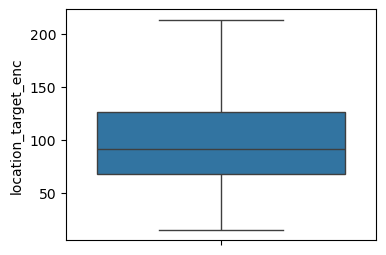

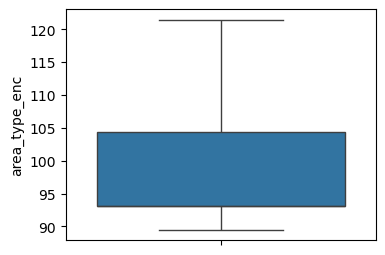

In [2784]:
for col in cols:
    plt.figure(figsize=(4,3))
    sns.boxplot(data[col])
    plt.show()

# AS i have done with outlier we have to update the values of location_enc and area_enc

In [2786]:
loc_price_mean = data.groupby('location')['price'].mean()
data['location_target_enc'] = data['location'].map(loc_price_mean)
loc_price_mean.to_csv("location_encoding.csv", index=True)

In [2787]:
lc=pd.read_csv(r"location_encoding.csv")

In [2788]:
# lc

In [2789]:
data['area_type'].unique(),data['area_type_enc'].unique()

(array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
        'Carpet  Area'], dtype=object),
 array([ 93.03925456, 121.4682878 , 104.41086785,  89.50235632]))

In [2790]:
area_type_mean = data.groupby('area_type')['price'].mean()
data['area_type_enc'] = data['area_type'].map(area_type_mean)
area_type_mean.to_csv("area_encoding.csv", index=True)

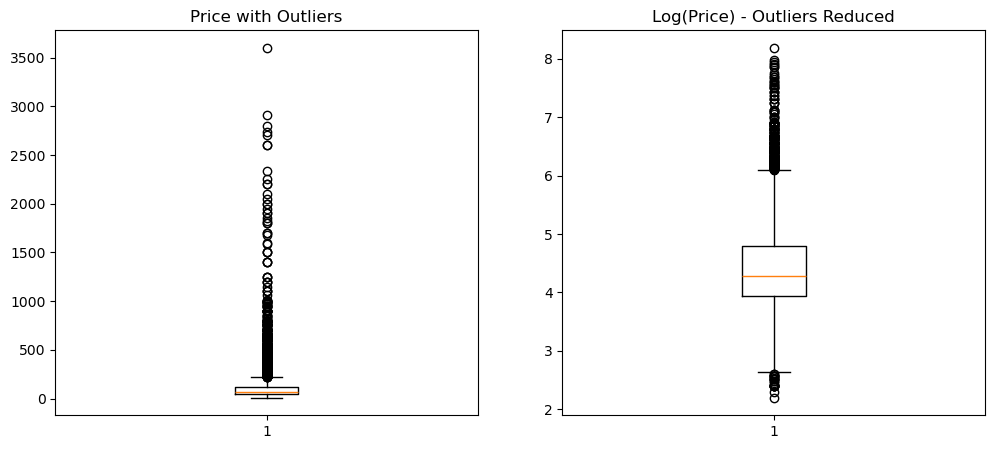

In [2791]:
# Before log (with outliers)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(data['price'])
plt.title("Price with Outliers")

# After log transform
plt.subplot(1,2,2)
plt.boxplot(np.log1p(data['price']))
plt.title("Log(Price) - Outliers Reduced")

plt.show()

# Now for output col(price) i'm using log transform so that my model can also predict for higher prices

In [2793]:
data['price']=np.log1p(data['price'])

In [2794]:
data.head()

,area_type,availability,location,size,total_sqft,bath,price,location_target_enc,area_type_enc
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,3.690628,47.406870,92.708660
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2525.0,4.5,4.795791,115.015882,209.619795
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,4.143135,61.252527,104.046848
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,4.564348,115.348261,92.708660
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,3.951244,95.630303,92.708660


# After this data preprocessing is complete

In [2796]:
Model_data=data.drop(columns=['area_type', 'availability', 'location'])

In [2797]:
Model_data.head()

,size,total_sqft,bath,price,location_target_enc,area_type_enc
0,2.0,1056.0,2.0,3.690628,47.406870,92.708660
1,4.0,2525.0,4.5,4.795791,115.015882,209.619795
2,3.0,1440.0,2.0,4.143135,61.252527,104.046848
3,3.0,1521.0,3.0,4.564348,115.348261,92.708660
4,2.0,1200.0,2.0,3.951244,95.630303,92.708660


In [2798]:
x=Model_data.drop(columns='price')
y=Model_data['price']

In [2799]:
# y

In [2800]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

In [2801]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data only
x_train_scaled = scaler.fit_transform(x_train)

# Use the same scaler to transform test data
x_test_scaled = scaler.transform(x_test)

In [2802]:
x_train_scaled

array([[ 0.36362346, -1.52094311, -0.64612368,  0.17176582,  2.39345981],
       [ 0.36362346,  0.52134387,  0.44827159, -0.68557399,  2.39345981],
       [-0.79704507, -0.13745838, -0.64612368, -0.27278278, -0.46960265],
       ...,
       [ 1.52429199,  2.11990816,  1.54266685,  1.32787653,  2.39345981],
       [ 0.36362346,  0.3275785 ,  0.44827159,  0.8420408 , -0.46960265],
       [-1.9577136 , -1.87782016, -1.74051895, -0.83886516,  2.39345981]])

In [2803]:
y_scaler = StandardScaler()

# Fit only on training y
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))

# Transform test y
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

# First i'm going to Linear reg as baseline model lets how well it doing 

In [2805]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train_scaled)

LinearRegression()

In [2806]:
lr.score(x_test_scaled,y_test_scaled),lr.score(x_train_scaled,y_train_scaled)

(0.7765418285129029, 0.7866955624138532)

# Now to calculate all the performance metrices

In [2808]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions
y_train_pred_lr = lr.predict(x_train_scaled)
y_test_pred_lr  = lr.predict(x_test_scaled)

# Train metrics
train_mae = mean_absolute_error(y_train, y_train_pred_lr)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_scaled, y_train_pred_lr)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred_lr)
test_mse = mean_squared_error(y_test, y_test_pred_lr)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_scaled, y_test_pred_lr)

print("Train Metrics:")
print(f"MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


Train Metrics:
MAE: 4.4152, MSE: 19.6194, RMSE: 4.4294, R²: 0.7867

Test Metrics:
MAE: 4.4182, MSE: 19.7045, RMSE: 4.4390, R²: 0.7765


# I got 78percent to score which is good But i can improve this using Xg boost 

In [2810]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500, learning_rate=0.02, max_depth=5, random_state=42,reg_alpha=0.1, reg_lambda=1)
xgb.fit(x_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [2811]:
y_train_pred = xgb.predict(x_train_scaled)
y_test_pred = xgb.predict(x_test_scaled)

In [2812]:
def print_metrics(y_true, y_pred, dataset_name=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Evaluate
print_metrics(y_train_scaled, y_train_pred, "Train")
print_metrics(y_test_scaled, y_test_pred, "Test")


Train Metrics:
MAE: 0.2620, MSE: 0.1189, RMSE: 0.3449, R²: 0.8811

Test Metrics:
MAE: 0.3093, MSE: 0.1787, RMSE: 0.4228, R²: 0.8260


In [2813]:
y_train_pred_original = y_scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred_original  = y_scaler.inverse_transform(y_test_pred.reshape(-1, 1))

y_train_original = y_scaler.inverse_transform(y_train_scaled.reshape(-1, 1))
y_test_original  = y_scaler.inverse_transform(y_test_scaled.reshape(-1, 1))

# Now lets see if we can make more improvements by hyperparameter tuning

In [2815]:
from sklearn.model_selection import RandomizedSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [200, 500, 800, 1000],
    'max_depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train_scaled, y_train_scaled)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Score: -0.17478315831561614


# after hyperparameter tuning we got neg mse of -0.179 which is good

In [2817]:
best_xgb = random_search.best_estimator_

In [2818]:
best_xgb.score(x_train_scaled,y_train_scaled),best_xgb.score(x_test_scaled,y_test_scaled)

(0.8705515218012545, 0.8278876773915568)

In [2819]:
y_train_pred_new= best_xgb .predict(x_train_scaled)
y_test_pred_new = best_xgb .predict(x_test_scaled)

In [2820]:
def print_metrics(y_true, y_pred, dataset_name=""):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

# Evaluate
print_metrics(y_train_scaled, y_train_pred_new, "Train")
print_metrics(y_test_scaled, y_test_pred_new, "Test")


Train Metrics:
MAE: 0.2734, MSE: 0.1294, RMSE: 0.3598, R²: 0.8706

Test Metrics:
MAE: 0.3090, MSE: 0.1768, RMSE: 0.4205, R²: 0.8279


# Got not much improvement in score

In [2822]:
# import matplotlib.pyplot as plt
# y_test_pred_lr= lr.predict(x_test_scaled)
# plt.scatter(y_test_scaled, y_test_pred, alpha=0.6)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Predicted vs Actual (XGBoost)")
# plt.plot([y_test_scaled.min(), y_test_scaled.max()],
#          [y_test_scaled.min(), y_test_scaled.max()],
#          "r--")
# plt.show()
# plt.scatter(y_test_scaled, y_test_pred_lr, alpha=0.6)
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Predicted vs Actual (Linear_reg)")
# plt.plot([y_test_scaled.min(), y_test_scaled.max()],
#          [y_test_scaled.min(), y_test_scaled.max()],
#          "r--")
# plt.show()


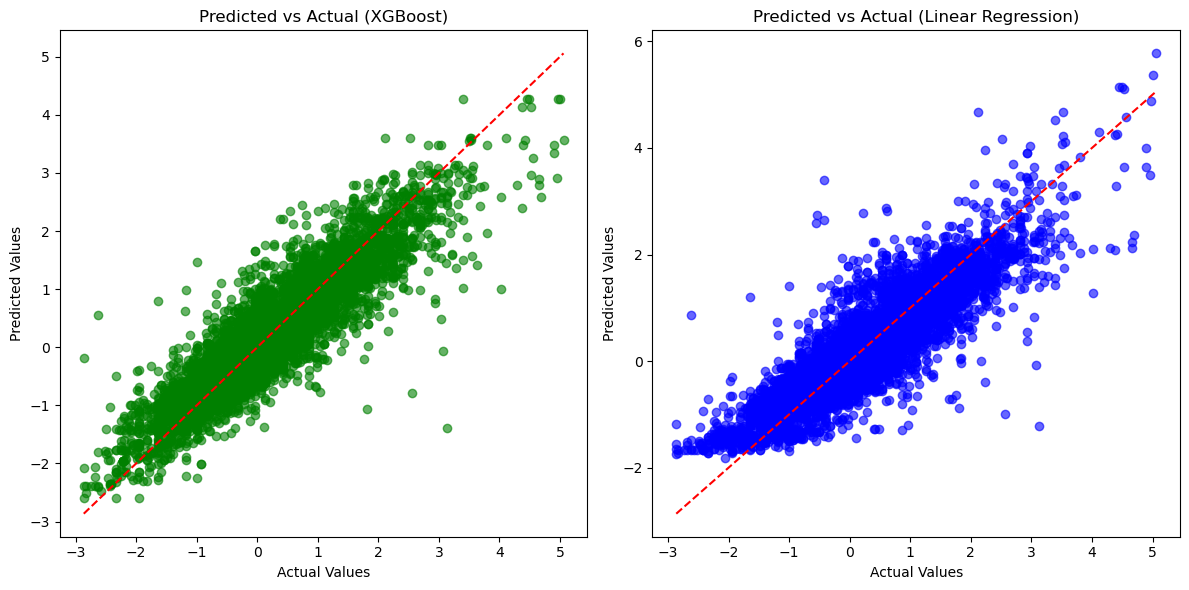

In [2823]:
import matplotlib.pyplot as plt

# Predictions
y_test_pred_lr = lr.predict(x_test_scaled)
y_test_pred_xgb = best_xgb.predict(x_test_scaled)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ---- XGBoost ----
axes[0].scatter(y_test_scaled, y_test_pred_xgb, alpha=0.6, color="green")
axes[0].plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()],
             "r--")
axes[0].set_title("Predicted vs Actual (XGBoost)")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")

# ---- Linear Regression ----
axes[1].scatter(y_test_scaled, y_test_pred_lr, alpha=0.6, color="blue")
axes[1].plot([y_test_scaled.min(), y_test_scaled.max()],
             [y_test_scaled.min(), y_test_scaled.max()],
             "r--")
axes[1].set_title("Predicted vs Actual (Linear Regression)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")

plt.tight_layout()
plt.show()


In [2907]:
y_test_pred_xgb1=y_scaler.inverse_transform(y_test_pred_xgb.reshape(-1,1))

array([[4.291359 ],
       [5.3480735],
       [4.809668 ],
       ...,
       [3.8471694],
       [3.8518398],
       [3.900476 ]], dtype=float32)

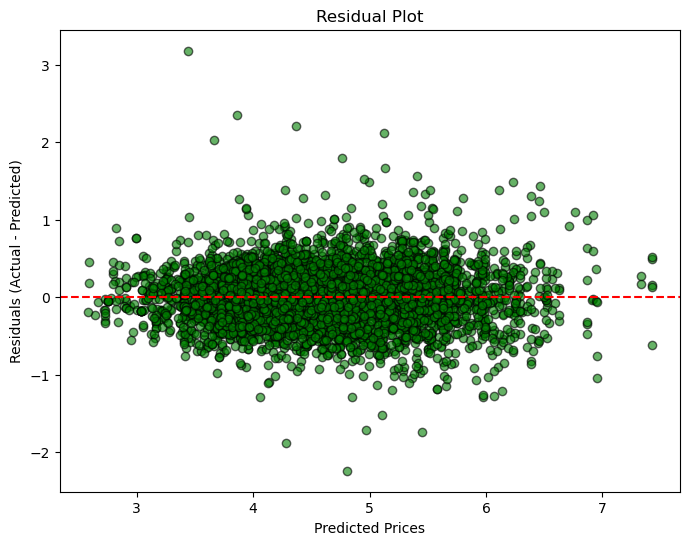

In [2916]:
residuals = y_test -  y_test_pred_xgb1.flatten()

plt.figure(figsize=(8,6))
plt.scatter(y_test_pred_xgb1.flatten(), residuals, alpha=0.6, color="green", edgecolors="k")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


# This plot tells me that how much diff is there in between actual and predicted value.Overall my model is doing good.Not much of error.

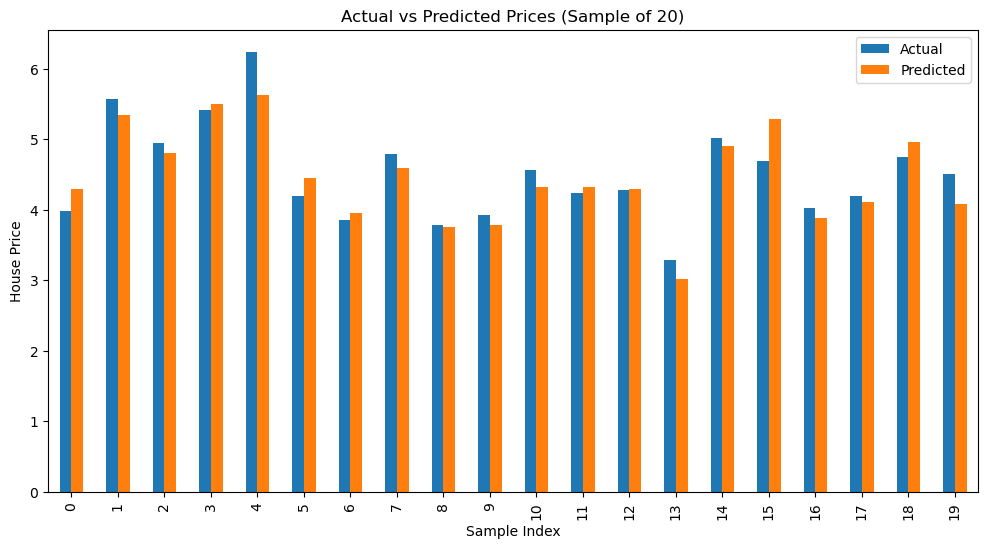

In [2922]:
import pandas as pd

comparison_df = pd.DataFrame({"Actual": y_test.values[:20], "Predicted": y_test_pred_xgb1.flatten()[:20]})
comparison_df.plot(kind="bar", figsize=(12,6))
plt.title("Actual vs Predicted Prices (Sample of 20)")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.show()


# By seeing this plot I can tell that my model is predicting values very close to the real values also for new data

In [2380]:
import pickle

pickle.dump(best_xgb,open('xgb_model.pkl','wb'))

# Save scaler (if you used StandardScaler/MinMaxScaler)
pickle.dump(scaler, open('scaler_X.pkl', 'wb'))
pickle.dump(y_scaler, open('scaler_y.pkl', 'wb'))
# pickle.dump(encoder, open('scaler_y.pkl', 'wb'))


In [2381]:
xgb.score(x_test_scaled,y_test_scaled)

0.8260455432209348

# The final score after hyperparameter tuning is 83%

In [2410]:
loaded_model = pickle.load(open('xgb_model.pkl', 'rb'))
loaded_scaler_X = pickle.load(open('scaler_X.pkl', 'rb'))
loaded_scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))

# Example new input (replace with real feature order)
# Suppose your features are [bhk, bath, sqft, area, location_encoded]
new_data = [[3,1521,3.0,115.348261,92.708660]]
# 3	1521.0	3.0	95.00	115.348261	93.039255
# 2	1056	2.0	1.0	39.07	48.316667	93.03925
# 2.0	1056.0	2.0		47.406870	92.708660
# 2.0	1200.0	2.0	3.951244	95.630303	92.708660
# 3.0	1521.0	3.0	4.564348	115.348261	92.708660
# Scale input features
new_data_scaled = loaded_scaler_X.transform(new_data)

# Predict (in log scale or scaled target)
log_price_pred = loaded_model.predict(new_data_scaled)

# Inverse transform back to original price
# If you used StandardScaler on y
price_pred = loaded_scaler_y.inverse_transform(log_price_pred.reshape(-1,1))

# If you used np.log1p(y) instead
price_pred = np.expm1(price_pred)

print("Predicted Price:", price_pred[0])

Predicted Price: [91.595604]
